In [3]:
import numpy as np
from tqdm import trange
def barabasi_albert_model_modified(N=20000, N0=5, m=4, A=0, seed = 57):
    # Create fully connected initial network
    degrees = np.zeros(N, dtype=int)
    links = []
    for i in range(N0):
        for j in range(i+1, N0):
            links.extend((i, j))
            degrees[i] += 1
            degrees[j] += 1
    # initialize random_generator
    random_generator = np.random.default_rng(seed)
    # Add new nodes step by step
    for t in trange(N0, N):
    # Calculate connection probabilities
        existing_degrees = degrees[:t] + A
        probabilities = existing_degrees / existing_degrees.sum()
        # Select target nodes for new connections (based on degree of nodes)
        targets = random_generator.choice(t, size=m, replace = False, p=probabilities)
        # Add new edges, update degrees
        for target in targets:
            links.extend((t, target))
            degrees[t] += 1
            degrees[target] += 1
    return degrees, links

In [8]:
degrees0, links0 = barabasi_albert_model_modified()
sorted_degrees0 = np.sort(degrees0)[::-1]
n = len(sorted_degrees0)
cdf0 = np.arange(1, 1+n)/n

100%|██████████| 19995/19995 [00:03<00:00, 5083.68it/s]


In [7]:
degrees1, links1 = barabasi_albert_model_modified(A=-2)
sorted_degrees1 = np.sort(degrees1)[::-1]
n = len(sorted_degrees1)
cdf1 = np.arange(1, 1+n)/n

100%|██████████| 19995/19995 [00:03<00:00, 5186.83it/s]


In [9]:
degrees2, links2 = barabasi_albert_model_modified(A=2)
sorted_degrees2 = np.sort(degrees2)[::-1]
n = len(sorted_degrees2)
cdf2 = np.arange(1, 1+n)/n

100%|██████████| 19995/19995 [00:03<00:00, 5373.00it/s]


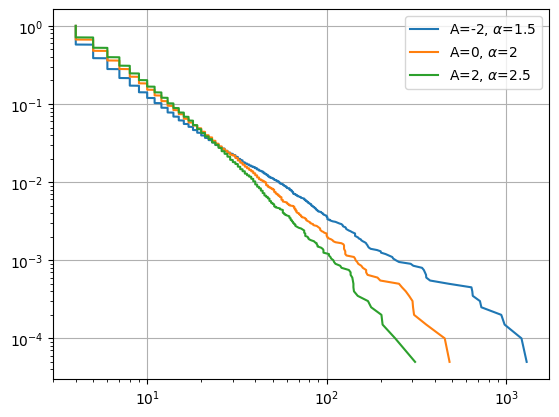

In [17]:
import matplotlib.pyplot as plt
plt.loglog(sorted_degrees1, cdf1, label=r"A=-2, $\alpha$=1.5")
plt.loglog(sorted_degrees0, cdf0, label=r"A=0, $\alpha$=2")
plt.loglog(sorted_degrees2, cdf2, label=r"A=2, $\alpha$=2.5")
plt.legend()
plt.grid()